# 로지스틱 회귀

이름은 회귀지만 분류 작업에 사용할 수 있다.

여기서는 이진 분류(Binary Classification)을 다룬다.

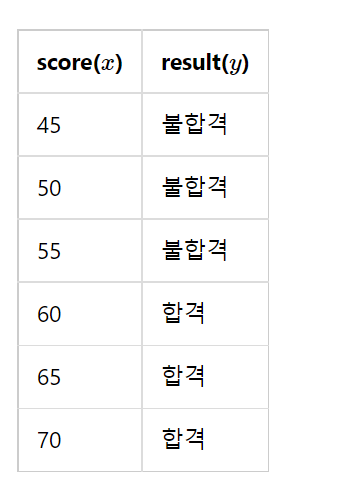

합격을 1이라고 하고 불합격을 0이라 한다면 이런 그래프가 그려질 것이다.

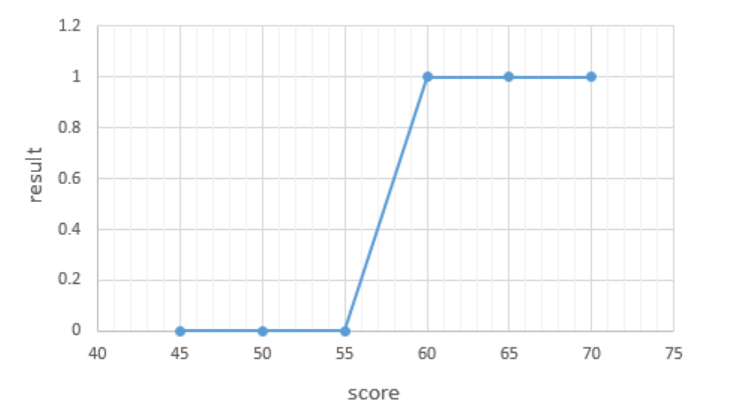

이처럼 분류에서의 x와 y의 관계에서는 s자 형태의 그래프가 필요하다. 

대표적으로 이러한 모양을 갖는 함수는 시그모이드 함수이다. 

따라서 선형 회귀에서 사용한 공식 Wx+b를 시그모이드의 입력으로 넣어서 즉, 합성한다면 W를 갱신해가면서 적절히 분류하도록 학습시킬 수 있다.

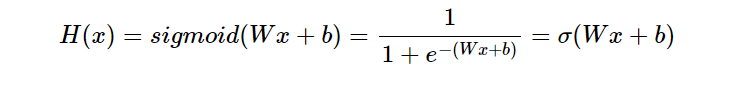

## 시그모이드 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 시그모이드 함수 정의
def sigmoid(x):
  return 1/(1+np.exp(-x))

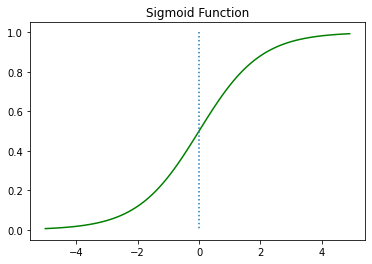

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

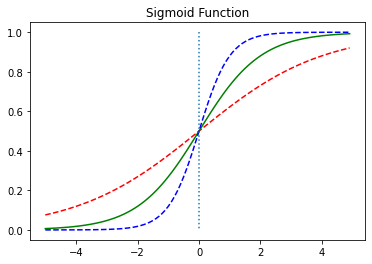

In [5]:
# W의 변화에 따른 시그모이드 그래프 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

W가 커질수록 경사가 급격해지는 것을 볼 수 있다. 

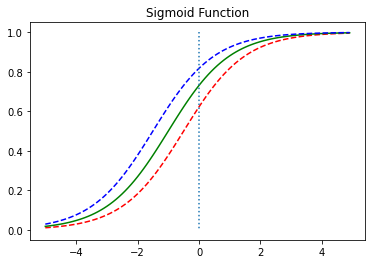

In [6]:
# b의 변화에 따른 시그모이드 그래프 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

b가 커질수록 왼쪽으로 기우는 것을 볼 수 있다. 반대로 b가 음수로 커진다면 오른쪽으로 기울어질 것이다.

W와 b를 학습은 H(x)값에 따라 1과 0로 분류되는 분류기를 만드는 것이라 할 수 있다.

## 비용함수(Cost function)

로지스틱 회귀에서는 비용함수로 평균 제곱 오차(mse)를 사용할 수 없다. 왜냐하면 로지스틱 회귀에서는 함수를 합성했기 때문에 제곱을 하게 되면 2차를 넘어가게 된다. 즉 접선의 기울기가 0이 되는지점이 여러개가 된다. (아래 그림 참조)

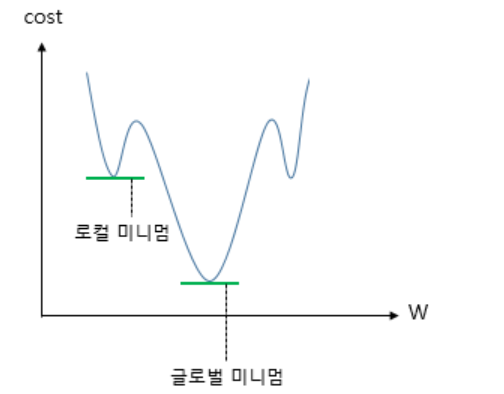

이러한 그래프에서 최적화를 진행하면 아직 오차가 큰데도 최소값에 도달했다고 오판할 수 있다.(미분값, 접선의 기울기로 판단하므로)

이를 전체 함수에 걸쳐 최소값인 글로벌 미니멈(Global Minimum)이 아닌 특정 구역에서의 최소값인 **로컬 미니멈**(Local Minimum)에 도달했다고 한다.

따라서 로지스틱 회귀에 맞는 다른 비용함수를 찾아야 한다.

실제값(정답)이 1일 때 예측값이 0이라면 오차는 커져야 하며, 

실제값이 0일 때 예측값이 1에 가까워지면 오차가 커져야 한다.

이를 충족하는 함수는 바로 로그함수다.

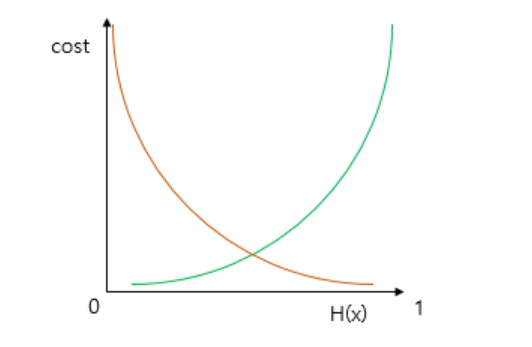

실제값(정답)이 1일 때의 그래프가 주황색 선, 실제값이 0일 때의 그래프가 초록색 선이다. 

두 로그 함수를 식으로 표현하면 다음과 같다.

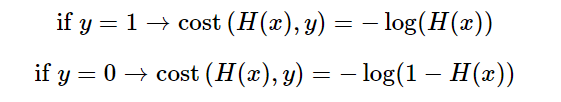

놀랍게도 두 식을 하나로 표현할 수 있다.

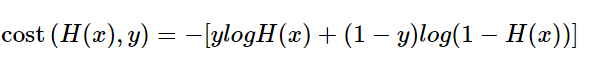

선형 회귀에서 모든 오차의 평균을 구해 평균 제곱 오차를 사용한 것과 마찬가지로 여기서도 모든 오차의 평균을 구해 이를 비용함수로 사용한다.

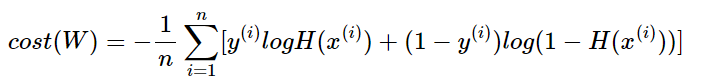

이 그래프에서 얻어지는 그레디언트를 가지고 W를 갱신하게 되는 것이다.

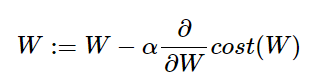